# 911 Calls Capstone Project

## Importing numpy and pandas 

In [2]:
import numpy as np
import pandas as pd

## Importing visualization libraries and setting%matplotlib inline. 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Reading csv file into a dataframe and checking the file characterstics ,datatypes and the sample data of the file.

In [5]:
df = pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Analyzing the data

In [8]:
#Top 5 zipcodes for 911 calls 

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [11]:
# Checking the top 5 townships (twp) for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [13]:
# Checking unique title codes

df['title'].nunique()

110

## Creating new features/columns based on the data already available¶

In [5]:
app = df['title'].apply(lambda text : text.split(':')[0])
df['reason']= app
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

In [6]:
# No. of times 911 call was made based on the particular reason

df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

## Using seaborn to create a countplot of 911 calls by Reason.

<AxesSubplot:xlabel='reason', ylabel='count'>

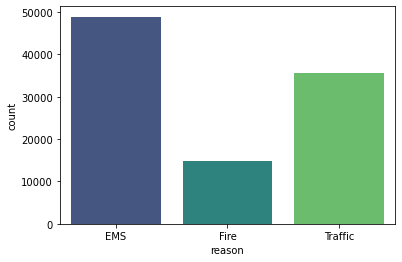

In [131]:
import seaborn as sns
sns.countplot(x= 'reason', data=df, palette='viridis')

The above plot indicates that the number of 911 calls for Fire emergency was least and the maximum calls were made due to some medical emergency

## Breaking timestamp column to check the various attributes of time to analyse data deeper

In [7]:
type(df['timeStamp'].iloc[0]) #getting the type of the first value of timestamp

str

In [8]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], yearfirst=True)

In [9]:
# Creating Hour,month,Day of Week columns based on timestamp column to analyse the count of 911 calls 
# at a specific interval of time

df['hour'] = df['timeStamp'].apply(lambda text: text.hour) 
df['month']= df['timeStamp'].apply(lambda text: text.month) 
df['day']= df['timeStamp'].apply(lambda text: text.dayofweek) 

In [10]:
# Map strings to the day of week

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day'] = df['day'].map(dmap)

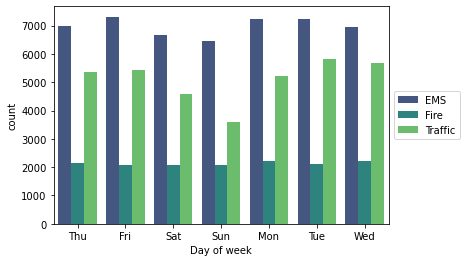

In [132]:
# Plotting the number of 911 calls made during day of week

sns.countplot(x='day', data=df, hue='reason', palette='viridis')
plt.xlabel('Day of week')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Plotting the number of 911 calls made in a month**

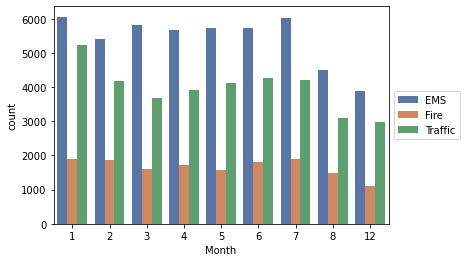

In [131]:
sns.countplot(x='month', data=df, hue='reason', palette='deep')
plt.xlabel('Month')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**The months from 9 to 11 are missing in the data and therefore not reflected in the plot. So planning to create a line plot to fill the missing months**

In [136]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day,Day of week,Day_of_week
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,0,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,0,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,0,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,0,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,0,11423


<AxesSubplot:xlabel='month'>

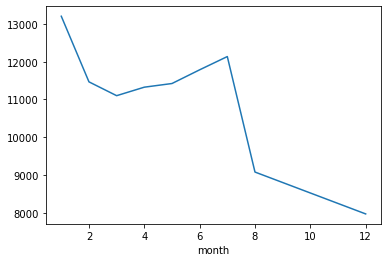

In [149]:
# Data of months from Sept to Nov are missing, so plotting the information in another way

byMonth['title'].plot()

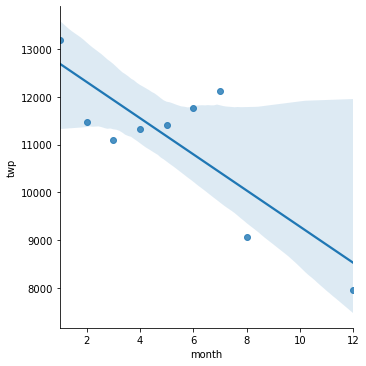

In [157]:
# Resetting index to make month as a column and creating a linear model plot to get the count with respect to month.

bymonth = byMonth.reset_index()
sns.lmplot(x='month', y='twp', data=bymonth, face)

**The above lm plot shows the error in shaded area and this area is more between month 8 and 12 because we have less information between these months** 

In [42]:
# Creating Date column

df['Date']= df['timeStamp'].apply(lambda text: text.date()) 
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

<AxesSubplot:xlabel='Date'>

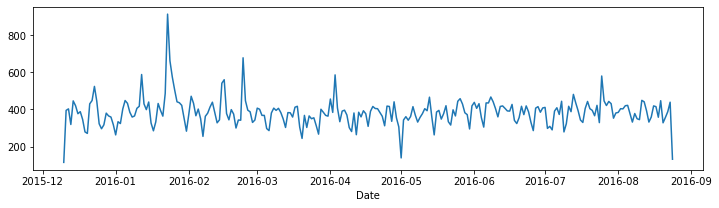

In [134]:
# Plotting Date against the count of calls. Using DateFormatter to format the date on the graph

byDate = df.groupby('Date').count()
byDate['twp'].plot(figsize=(12,3))

**There is a significant spike during the month of February as per the above plot**

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

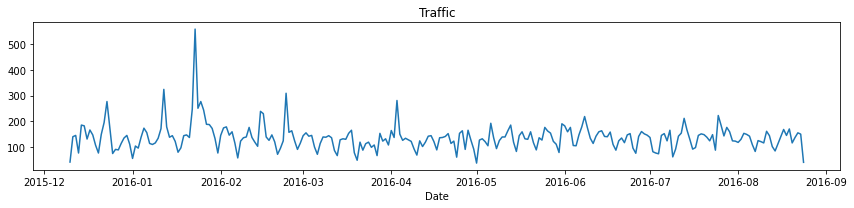

In [206]:
# Plotting Date against the count of calls , for Reason - Traffic


df[df['reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

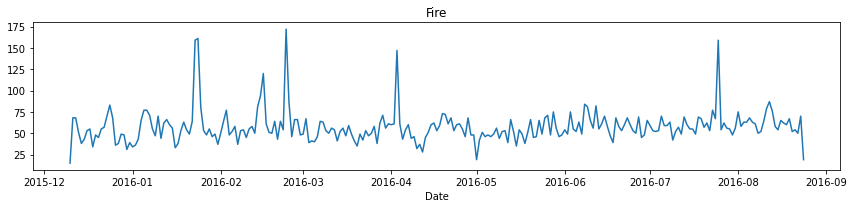

In [205]:
# Plotting Date against the count of calls , for Reason - Fire

df[df['reason']=='Fire'].groupby('Date').count()['twp'].plot(figsize=(12,3))
plt.title('Fire')
plt.tight_layout()

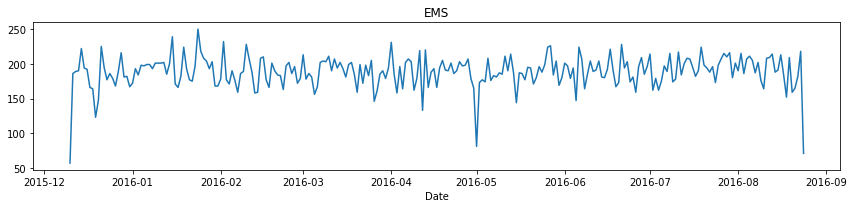

In [208]:
# Plotting Date against the count of calls , for Reason - EMS

df[df['reason']=='EMS'].groupby('Date').count()['twp'].plot(figsize=(12,3))
plt.title('EMS')
plt.tight_layout()

In [116]:
# Creating multi level index and then unstacking one of the index into column and calculating the count against 
# the 2 indices

df1= df.groupby(['day','hour']).count()
dayHour= df1.unstack(level=-1)['reason']
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='hour', ylabel='day'>

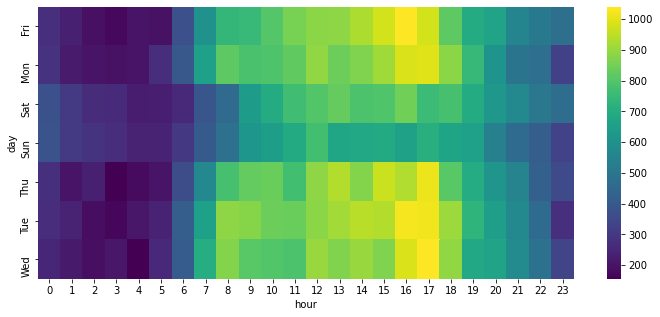

In [137]:
# Plotting a heapmap by detailing the number of calls made on a particular day at particular hour

plt.figure(figsize=(12,5))
sns.heatmap(dayHour, cmap='viridis')

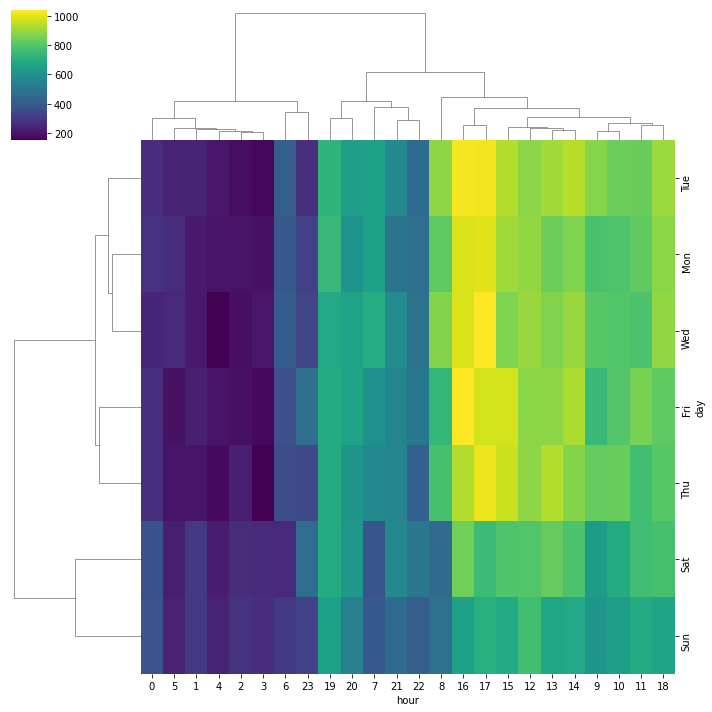

In [121]:
sns.clustermap(dayHour, cmap='viridis')

In [127]:
# Plotting a heatmap by detailing the number of calls made in a particular month on a particular day of week

df2 = df.groupby(['day', 'month']).count()
monthDay = df2.unstack(level=-1)['reason']
monthDay

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='month', ylabel='day'>

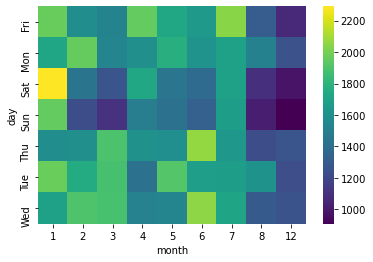

In [129]:
# Plotting a heatmap by detailing the number of calls made on a particular day in a particular month

sns.heatmap(monthDay, cmap= 'viridis')

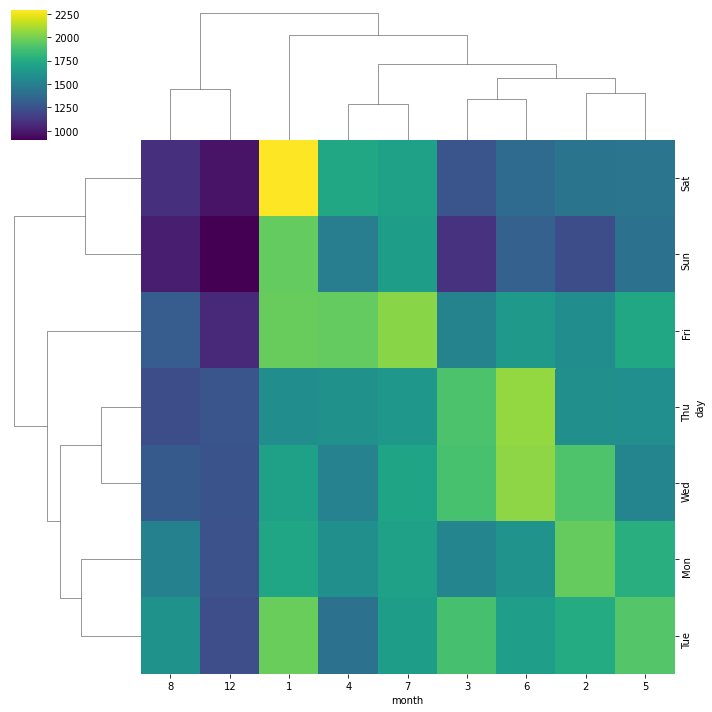

In [130]:
sns.clustermap(monthDay, cmap= 'viridis')

## Conclusion

- The number of 911 calls were made between 8:00 to 18:00 hours maybe because people are mostly asleep during night.
- The number of 911 calls were least on Saturdays and Sundays
- The highest number of calls were made in the month of Jan on Saturday, otherwise the calls were usually on the lower side on Saturdays and Sundays.
- The Summer months usally had more 911 calls than winter months.
- The number of 911 calls for Fire emergency was least and the maximum calls were made due to some medical emergency
- The number of 911 calls decreased considerably from month August to December.